<a href="https://colab.research.google.com/github/ialeenz/DataMining-Project/blob/main/phase3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Phase 3 Part 1: Classification 🧑‍💻

*Description:*
In this part, we import the necessary libraries and load the dataset. We use a *Decision Tree classifier* for classification and will later evaluate its performance using Entropy and Gini index as criteria.

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier  # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


# Load data
df = pd.read_csv("lung_cancer_preprocessed.csv")
print(df.head())  #get the first 5 rows

   patient_id  age  gender  pack_years  radon_exposure  asbestos_exposure  \
0      100000    2       1    0.660248               2                  0   
1      100001    0       0    0.127785               2                  0   
2      100002    2       0    0.004055               1                  1   
3      100003    2       0    0.440640               0                  0   
4      100004    0       0    0.444313               1                  1   

   secondhand_smoke_exposure  copd_diagnosis  alcohol_consumption  \
0                          0               1                    1   
1                          1               1                    1   
2                          1               1                    0   
3                          1               0                    1   
4                          0               1                    0   

   family_history lung_cancer  
0               0          No  
1               1         Yes  
2               0         

### *Data Splitting 📊*

*Description:*
In this step, we divided the dataset into *Features* and *Target. The **Features* are the input variables (like age, smoking habits, etc.), and the *Target* is the variable we are trying to predict (whether the patient has lung cancer or not). The features are stored in X, while the target is stored in y.

In [ ]:
#split dataset in features and target variable
fn = df.keys().tolist()[:-1] #df columns names without last column 'species'
X = df[fn] # Features names
y = df['lung_cancer'] # Target variable

### *Model Training and Evaluation 📊*

*Description:*
In this step, we apply the *Decision Tree classifier* with two different criteria: *Entropy* and *Gini. We train the model on the training data, predict the target variable on the test set, and calculate the accuracy for both criteria. We also compute the **confusion matrix* for each criterion to evaluate the model's performance.

In [ ]:
# تقسيم البيانات إلى ثلاث تقسيمات مختلفة (90% تدريب، 10% اختبار، 80% تدريب، 20% اختبار، 70% تدريب، 30% اختبار)
partitions = [(0.1, 0.9), (0.2, 0.8), (0.3, 0.7)]
results = {}

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

### *Model Evaluation: Confusion Matrices and Heatmaps 🎯*

*Description:*
In this step, we evaluate the performance of the *Decision Tree classifier* by visualizing the *confusion matrices* for both *Entropy* and *Gini* criteria. The confusion matrices are displayed using *heatmaps. These heatmaps show the number of correct and incorrect predictions made by the model for each class ("Yes" or "No"). We observe the performance for different **test sizes* (10%, 20%, 30%) to assess how well the model generalizes.

In [ ]:
# Create Decision Tree classifier object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)


**Interpretation:**
The heatmaps show the *confusion matrices* for both *Entropy* and *Gini* with a *30% test size*. The matrices display:
- *True Positives*: Correctly predicted "Yes" (lung cancer).
- *False Positives*: Incorrectly predicted "Yes" for "No" cases.
- *True Negatives*: Correctly predicted "No" (no lung cancer).
- *False Negatives*: Incorrectly predicted "No" for "Yes" cases.

The heatmaps allow us to compare how well each criterion (Entropy and Gini) performs in predicting the correct class, with a slight difference in accuracy for each method. This helps identify which model is more effective.

In [ ]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6445333333333333


[[2100 2580]
 [2752 7568]]


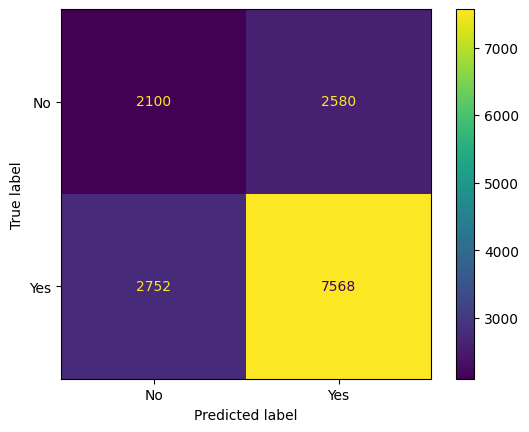

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Compute and print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

from sklearn.metrics import ConfusionMatrixDisplay
cn = df['lung_cancer'].unique()  # class names

# Create a confusion matrix display object
disp = ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, display_labels=cn)

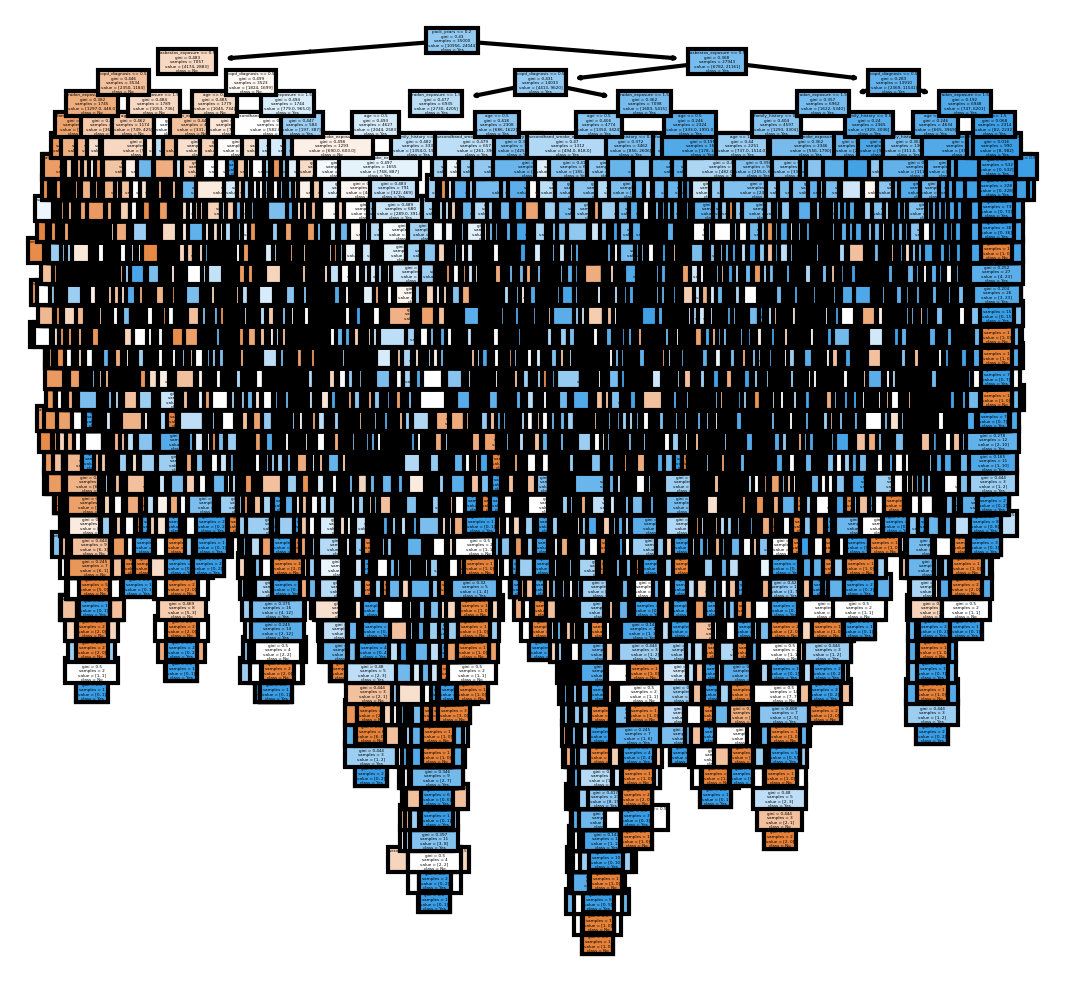

In [ ]:
from sklearn import tree

# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)

tree.plot_tree(clf,
               feature_names=fn,
               class_names=cn,
               filled=True)

# You can save your plot if you want
fig.savefig('classification.png')

Accuracy: 0.7275333333333334


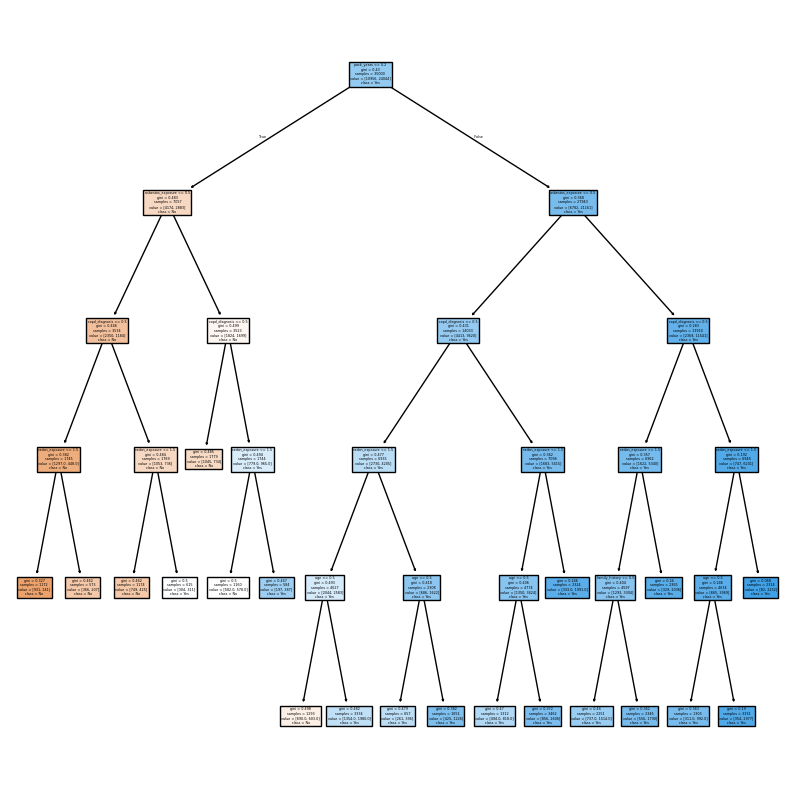

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
import graphviz

# إعداد معلمات الشجرة لتقليل التعقيد
clf = DecisionTreeClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf=10,
                             max_leaf_nodes=20,
                             random_state=42)

# تدريب نموذج شجرة القرار
clf.fit(X_train, y_train)

# التنبؤ بالبيانات الاختبارية
y_pred = clf.predict(X_test)

# حساب الدقة
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# عرض الشجرة
fig = plt.figure(figsize=(10, 10))
tree.plot_tree(clf, feature_names=fn, class_names=cn, filled=True)
fig.savefig('decision_tree.png', dpi=300)  # حفظ الصورة بدقة عالية
plt.show()

# تحميل الصورة إلى جهازك
from google.colab import files
files.download('decision_tree.png')

In [ ]:
import pickle

# save your model to a file
filename = 'decision_tree_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# load your model from a file
loaded_model = pickle.load(open(filename, 'rb'))

Predictions for test dataset: 
 ['Yes' 'Yes' 'Yes' ... 'Yes' 'No' 'Yes']

Predictions for the new test dataset: ['Yes' 'Yes' 'Yes']


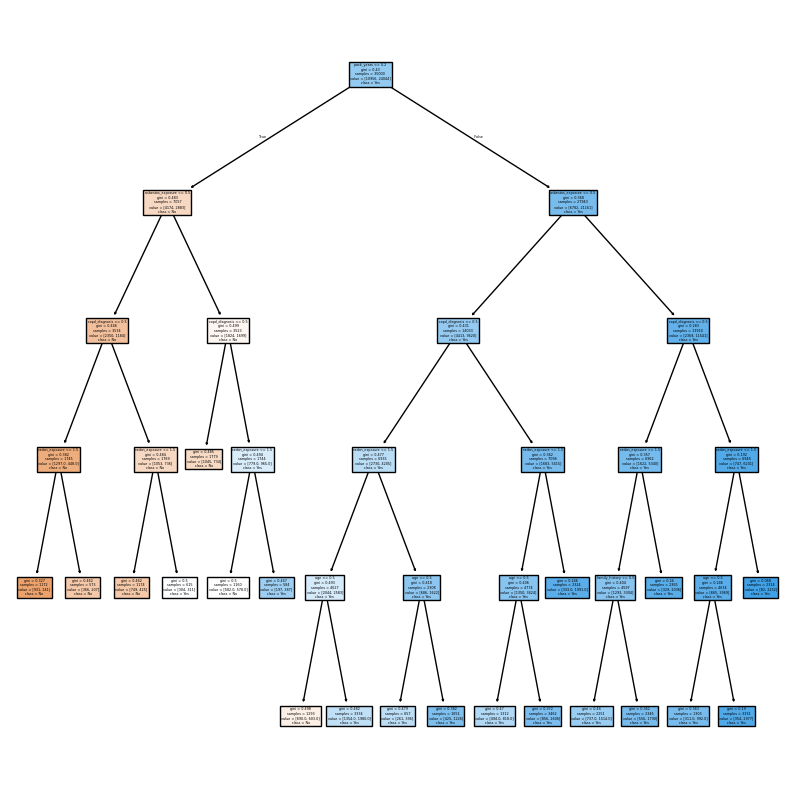

In [ ]:
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

# حفظ النموذج إلى ملف
filename = 'decision_tree_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# تحميل النموذج من ملف
loaded_model = pickle.load(open(filename, 'rb'))

# التنبؤ باستخدام النموذج على مجموعة البيانات الاختبارية
predictions = loaded_model.predict(X_test)
print("Predictions for test dataset: \n", predictions)

# بيانات جديدة للتنبؤ
new_values = np.array([[5.1, 3.5, 1.4, 0.2, 0, 1, 0, 1, 0, 0],  # تأكد من أنها تحتوي على نفس الأعمدة في X_test
                      [6.7, 3.1, 4.4, 1.4, 0, 0, 1, 0, 1, 1],
                      [7.6, 3.3, 6.6, 2.1, 1, 1, 0, 0, 1, 0]])

# تحويل البيانات إلى DataFrame باستخدام الأعمدة نفسها الموجودة في X_test
new_values_df = pd.DataFrame(new_values, columns=X_test.columns)

# التنبؤ باستخدام النموذج على البيانات الجديدة
predictions = loaded_model.predict(new_values_df)
print(f"\nPredictions for the new test dataset: {predictions}")

# عرض الشجرة
fig = plt.figure(figsize=(10, 10))
tree.plot_tree(clf, feature_names=X_test.columns, class_names=cn, filled=True)
fig.savefig('decision_tree.png', dpi=300)  # حفظ الصورة بدقة عالية
plt.show()